# 线性分类

## Logistic  and  SVC

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [3]:
X,y=mglearn.datasets.make_forge()

In [6]:
df_X=pd.DataFrame(X,columns=['1','2'])
df_y=pd.DataFrame(y,columns=['y'])

D:\mathwork\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


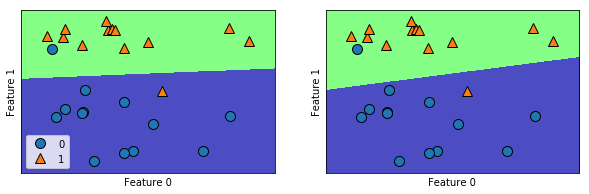

In [17]:
fig,axes=plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):#均为默认参数，默认C=1
    clf=model.fit(df_X,df_y)
    mglearn.plots.plot_2d_classification(clf,df_X.values,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(df_X.iloc[:,0],df_X.iloc[:,1],df_y.iloc[:,0],ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

In [18]:
#对于Logisitic 和SVC ，决定正则化的参数为C，C值越大，对应的正则化越弱
#换句话说参数C值越大，那么Logistic和SVC尽可能将训练集及你到最好，而如果C值较小，那么模型更强调
#是系数向量w接近于0

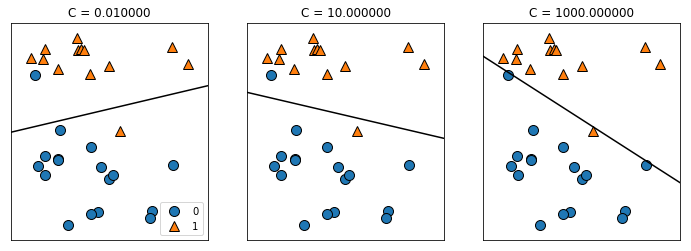

In [19]:
mglearn.plots.plot_linear_svc_regularization()

## cancer数据集

In [44]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [45]:
X=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
X_train,X_test,y_train,y_test=train_test_split(X,cancer['target'],random_state=42)

In [46]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
print('training set score:{}'.format(clf.score(X_train,y_train)))
print('test set score:{}'.format(clf.score(X_test,y_test)))

training set score:0.9577464788732394
test set score:0.958041958041958


### 调整C

In [47]:
logr100=LogisticRegression(C=100).fit(X_train,y_train)
print('training set score:{}'.format(logr100.score(X_train,y_train)))
print('test set score:{}'.format(logr100.score(X_test,y_test)))

training set score:0.9741784037558685
test set score:0.958041958041958


In [51]:
logr001=LogisticRegression(C=0.01).fit(X_train,y_train)
print('training set score:{}'.format(logr001.score(X_train,y_train)))
print('test set score:{}'.format(logr001.score(X_test,y_test)))

training set score:0.9248826291079812
test set score:0.958041958041958


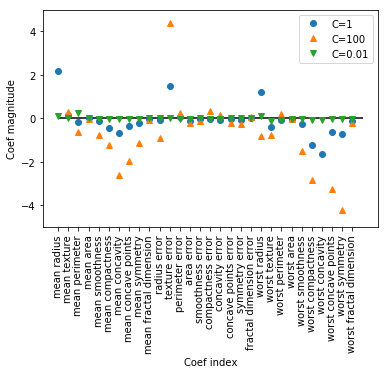

In [57]:
#看一下正则化参数C取到的不同的值时模型学到的系数
plt.plot(clf.coef_.T,'o',label='C=1')
plt.plot(logr100.coef_.T,'^',label='C=100')
plt.plot(logr001.coef_.T,'v',label='C=0.01')
plt.xticks(range(cancer['data'].shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer['data'].shape[1])
plt.ylim(-5,5)
plt.xlabel('Coef index')
plt.ylabel('Coef magnitude')
plt.legend()

In [55]:
logr100.coef_.T

array([[ 6.44482689],
       [ 0.31629299],
       [-0.63294183],
       [-0.02564175],
       [-0.77808431],
       [-1.20135721],
       [-2.60018034],
       [-1.95060242],
       [-1.14040647],
       [-0.05001325],
       [-0.91752269],
       [ 4.37624617],
       [ 0.25453432],
       [-0.19703104],
       [-0.10942421],
       [ 0.34784767],
       [ 0.16399636],
       [-0.21715043],
       [-0.23437784],
       [ 0.06518095],
       [-0.79357315],
       [-0.73806125],
       [ 0.21829964],
       [-0.01178013],
       [-1.51840786],
       [-2.82379443],
       [-5.67507778],
       [-3.2362632 ],
       [-4.22347679],
       [-0.19879537]])

### L1正则化

Training accuracy of l1 with C=0.001:0.92
test accuracy of l1 with C=0.001:0.92
Training accuracy of l1 with C=1.000:0.96
test accuracy of l1 with C=1.000:0.95
Training accuracy of l1 with C=100.000:0.99
test accuracy of l1 with C=100.000:0.97


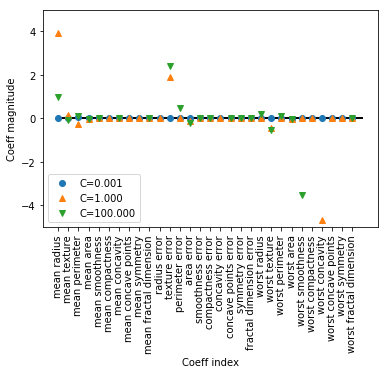

In [62]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty='l1').fit(X_train,y_train)
    print('Training accuracy of l1 with C={:.3f}:{:.2f}'.format(C,lr_l1.score(X_train,y_train)))
    print('test accuracy of l1 with C={:.3f}:{:.2f}'.format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    plt.xticks(range(cancer['data'].shape[1]),cancer['feature_names'],rotation=90)
    plt.hlines(0,0,cancer['data'].shape[1])
    plt.ylim(-5,5)
    plt.ylabel('Coeff magnitude')
    plt.xlabel('Coeff index')
    plt.legend(loc=3)

## 多分类

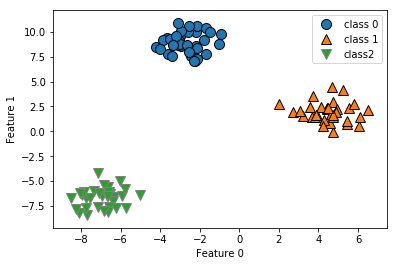

In [64]:
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['class 0','class 1','class2'])

In [65]:
l_svm=LinearSVC().fit(X,y)
print('Coef shape:',l_svm.coef_.shape)
print('Intercept shape:',l_svm.intercept_.shape)

Coef shape: (3, 2)
Intercept shpae: (3,)


(-10, 15)

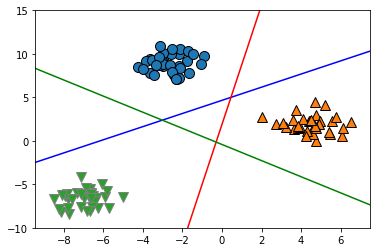

In [69]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(l_svm.coef_,l_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)

(-10, 15)

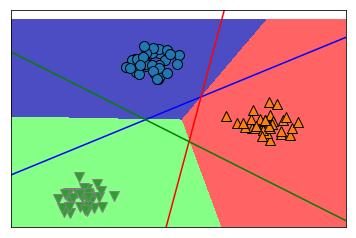

In [70]:
mglearn.plots.plot_2d_classification(l_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(l_svm.coef_,l_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)

In [ ]:
'''
线性模型的主要参数是正则化参数，在回归模型中叫作 alpha，在 LinearSVC 和 LogisticRegression 中叫作 C。
alpha 值较大或 C 值较小，说明模型比较简单。特别是对于回归模型
而言，调节这些参数非常重要。通常在对数尺度上对 C 和 alpha 进行搜索。你还需要确定
的是用 L1 正则化还是 L2 正则化。如果你假定只有几个特征是真正重要的，那么你应该用
L1 正则化，否则应默认使用 L2 正则化。如果模型的可解释性很重要的话，使用 L1 也会
有帮助。由于 L1 只用到几个特征，所以更容易解释哪些特征对模型是重要的，以及这些
特征的作用。
线性模型的训练速度非常快，预测速度也很快。这种模型可以推广到非常大的数据集，对
稀疏数据也很有效。如果你的数据包含数十万甚至上百万个样本，你可能需要研究如何使
用 LogisticRegression 和 Ridge 模型的 solver='sag' 选项，在处理大型数据时，这一选项
比默认值要更快。其他选项还有 SGDClassifier 类和 SGDRegressor 类，它们对本节介绍的
线性模型实现了可扩展性更强的版本。
线性模型的另一个优点在于，利用我们之间见过的用于回归和分类的公式，理解如何进
行预测是相对比较容易的。不幸的是，往往并不完全清楚系数为什么是这样的。如果你
的数据集中包含高度相关的特征，这一问题尤为突出。在这种情况下，可能很难对系数
做出解释。
如果特征数量大于样本数量，线性模型的表现通常都很好。它也常用于非常大的数据集，
只是因为训练其他模型并不可行。但在更低维的空间中，其他模型的泛化性能可能更好
'''

### 增加交互性或多项式

Text(0,0.5,'Feature 1')

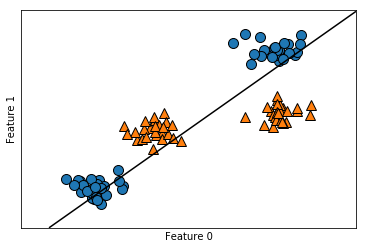

In [3]:
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=4,random_state=8)
y=y%2
l_svm=LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(l_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### 添加特征 

In [8]:
X_new=np.hstack([X,X[:,1:]**2])  #按行堆积
from mpl_toolkits.mplot3d import Axes3D,axes3d

Text(0.5,0,'feature1 ** 2')

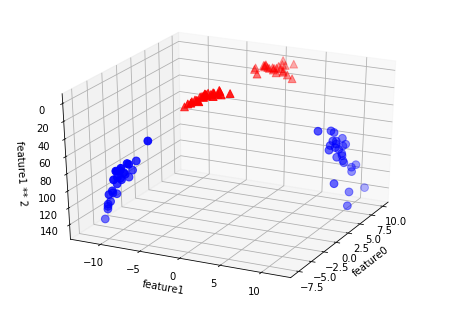

In [9]:
figure = plt.figure()
# 3D可视化
ax = Axes3D(figure, elev=-152, azim=-26)
# 首先画出所有y == 0的点，然后画出所有y == 1的点
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0.5,0,'feature1 ** 2')

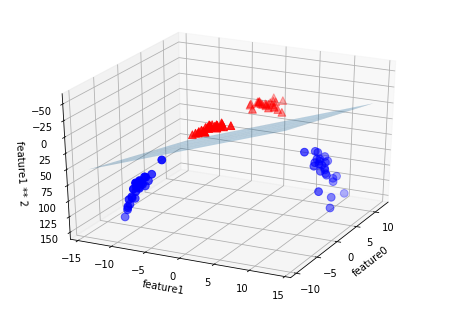

In [10]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 显示线性决策边界
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")